In [1]:
#author:Arian Qazvini
import json
import numpy as np
import matplotlib.pyplot as plt
# read json data file
f=open('taxi_requests.json')
data = json.load(f)
f.close()

login_times=data['request_time']

# uncomment next line to see how the data looks like
#display(login_times)

In [2]:
# convert time string to timestamps
from datetime import datetime, timezone
timestamps= [datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=timezone.utc).timestamp() for i in range(len(login_times))]
print(timestamps)
#timestamps


[72798.0, 72970.0, 72997.0, 72996.0, 73581.0, 73301.0, 72736.0, 74147.0, 74138.0, 74872.0, 73565.0, 73863.0, 74086.0, 74194.0, 74365.0, 74437.0, 74098.0, 74639.0, 74866.0, 74794.0, 75367.0, 74952.0, 75546.0, 75599.0, 76501.0, 76164.0, 76764.0, 76853.0, 77359.0, 79085.0, 78711.0, 79180.0, 79714.0, 79371.0, 79112.0, 79351.0, 79532.0, 79366.0, 79828.0, 79918.0, 79265.0, 80350.0, 80214.0, 80252.0, 79925.0, 80583.0, 80534.0, 80709.0, 80644.0, 80399.0, 81092.0, 83171.0, 82556.0, 83229.0, 83516.0, 83075.0, 83068.0, 83571.0, 83285.0, 83497.0, 83371.0, 82675.0, 83640.0, 83346.0, 83251.0, 83353.0, 82585.0, 83395.0, 83914.0, 83362.0, 84090.0, 83265.0, 84205.0, 83771.0, 84125.0, 83868.0, 84253.0, 84352.0, 84816.0, 84660.0, 84043.0, 84371.0, 84066.0, 84419.0, 84637.0, 85104.0, 85085.0, 84834.0, 84632.0, 85541.0, 85405.0, 85044.0, 84901.0, 85402.0, 85977.0, 85656.0, 85500.0, 84432.0, 85534.0, 85487.0, 85264.0, 86130.0, 85492.0, 85790.0, 85517.0, 85987.0, 85697.0, 86007.0, 85816.0, 86162.0, 86582.0, 

# Written questions

Please search online and read the documentation for strptime() and timestamp() and write down short answers to the following questions:

**A- What does the previous cell do?** ▶ strtime method gets a string with the given pattern and creates a datetime object from it . then for each date we save it's timestamp in a list.

**B- What does the concept of "timestamp" mean?** ▶ What are its type and unit? A timestamp is a sequence of characters or encoded information(seconds) used to find when a particular event occurred and this particular event or epoch is the starting point of that operating system.For Unix its 1970-1-1(Posix time).It's type is float and it's unit is second.

**C- Is the variable "timestamps" a list or a numpy array?** ▶ List

**D- Which day of week (Sunday, Monday, ...) is 1970-01-01?** ▶ Thursday
```
datetime.weekday(datetime.fromtimestamp(timestamps[0]))
#Monday is index 0
```



**E- Which function can convert a timestamp back to datetime?** ▶ datetime.fromtimestamp()



# Project questions

Explore data, write code, and search online to answer the following questions about the data:

1- How many days are there in the data?

In [3]:
days = set([])
for i in login_times:
     split = i.split(" ")
     days.add(split[0])
print("Days:" ,len(days))

Days: 103



2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

In [4]:
#---------------Method 1----------------------
# freq = {}
# for i in login_times:
#      split = i.split(" ")
#      if(split[0] in freq):
#           freq[split[0]]+=1
#      else:
#           freq[split[0]]=1
# sorted_list = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
# print("Busiest day :" ,list(sorted_list.keys())[0])
# print("Second busiest day :" ,list(sorted_list.keys())[1])
#----------------Method 2------------------------
dates = np.array([x.split(" ")[0] for x in login_times])
unique,counts = np.unique(dates,return_counts=True)
print("Busiest day:", unique[np.argsort(counts)[len(counts)-1]])
print("Second busiest day:", unique[np.argsort(counts)[len(counts)-2]])


Busiest day: 1970-04-04
Second busiest day: 1970-03-14



3- Which hour was the busiest hour (the hour with the most requests)?

In [5]:
hours = np.array([datetime.utcfromtimestamp(x).hour for x in timestamps])
unique,counts = np.unique(hours, return_counts=True)
print("Busiest hour:",unique[np.argmax(counts)])

Busiest hour: 22



4- Are there any two requests that happened at the same time?

In [6]:
#-------------------------------------
unique,counts = np.unique(np.array(timestamps),return_counts=True)
temp = np.where(counts>1)
print(np.unique([datetime.utcfromtimestamp(i).strftime("%Y-%m-%d") for i in unique[temp[0]]]))

['1970-01-02' '1970-01-03' '1970-01-04' '1970-01-06' '1970-01-07'
 '1970-01-08' '1970-01-09' '1970-01-10' '1970-01-11' '1970-01-12'
 '1970-01-13' '1970-01-14' '1970-01-15' '1970-01-16' '1970-01-17'
 '1970-01-18' '1970-01-19' '1970-01-21' '1970-01-22' '1970-01-23'
 '1970-01-24' '1970-01-25' '1970-01-28' '1970-01-29' '1970-01-30'
 '1970-01-31' '1970-02-01' '1970-02-02' '1970-02-03' '1970-02-05'
 '1970-02-06' '1970-02-07' '1970-02-08' '1970-02-09' '1970-02-10'
 '1970-02-11' '1970-02-12' '1970-02-13' '1970-02-14' '1970-02-15'
 '1970-02-16' '1970-02-17' '1970-02-18' '1970-02-19' '1970-02-20'
 '1970-02-21' '1970-02-22' '1970-02-23' '1970-02-24' '1970-02-25'
 '1970-02-26' '1970-02-27' '1970-02-28' '1970-03-01' '1970-03-02'
 '1970-03-03' '1970-03-04' '1970-03-05' '1970-03-06' '1970-03-07'
 '1970-03-08' '1970-03-09' '1970-03-10' '1970-03-11' '1970-03-12'
 '1970-03-13' '1970-03-14' '1970-03-15' '1970-03-16' '1970-03-17'
 '1970-03-18' '1970-03-19' '1970-03-20' '1970-03-21' '1970-03-22'
 '1970-03-


5- What is the longest gap between two consequent requests?

In [7]:
print("longest gap :",np.max(np.diff(timestamps)))
print("longest absolute gap :",np.max(np.absolute(np.diff(timestamps))))

longest gap : 5999.0
longest absolute gap : 5999.0



6- Overall, does the volume of requests increase or decrease over time?

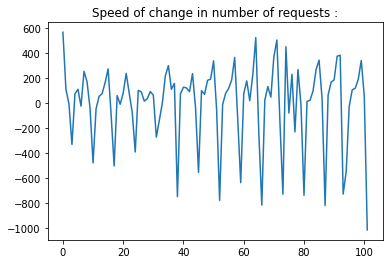

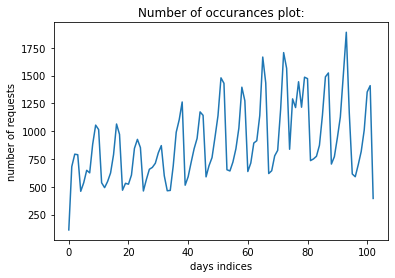

In [8]:
#Requests are grouped based on their date
unique,counts = np.unique(dates,return_counts=True)
plt.plot(np.diff(counts))
plt.title("Speed of change in number of requests :")
plt.show()
plt.title("Number of occurances plot:")
plt.xlabel("days indices")
plt.ylabel("number of requests")
plt.plot(counts)
plt.show()


7- Bonus: For each day calculate the average request time for all requests between 6:00 AM and 9:00 AM

In [9]:
import math
def getTime(seconds):
    hours = math.floor(seconds/3600)
    min = math.floor((seconds-(3600*hours))/60)
    second = seconds- hours*3600 - min*60
    return [hours,min,second]

date_6to9hour_dict={}

for i in timestamps:
   date_6to9hour_dict[datetime.utcfromtimestamp(i).strftime("%Y-%m-%d")]=[]

for i in timestamps:
     if(datetime.utcfromtimestamp(i).hour<9 and datetime.utcfromtimestamp(i).hour>=6):
       date_6to9hour_dict[datetime.utcfromtimestamp(i).strftime("%Y-%m-%d")].append(datetime.utcfromtimestamp(i).hour*3600 +datetime.utcfromtimestamp(i).minute*60 +datetime.utcfromtimestamp(i).second)

for k,v in date_6to9hour_dict.items():
  if(len(v)>0):
      sums = sum(v)
      avg = sums/len(v)
      print(k,str(getTime(int(avg))[0])+":"+str(getTime(int(avg))[1])+":"+str(getTime(int(avg))[2]))

1970-01-02 7:33:16
1970-01-03 7:21:27
1970-01-04 6:56:26
1970-01-05 7:57:57
1970-01-06 7:39:51
1970-01-07 7:33:48
1970-01-08 7:52:17
1970-01-09 7:11:39
1970-01-10 6:58:4
1970-01-11 6:50:49
1970-01-12 7:55:8
1970-01-13 7:32:31
1970-01-14 7:39:49
1970-01-15 7:27:53
1970-01-16 7:39:59
1970-01-17 7:17:16
1970-01-18 7:18:0
1970-01-19 7:42:0
1970-01-20 7:55:25
1970-01-21 7:49:50
1970-01-22 7:28:11
1970-01-23 7:30:43
1970-01-24 6:59:12
1970-01-25 7:4:53
1970-01-26 7:31:37
1970-01-27 7:31:4
1970-01-28 7:43:23
1970-01-29 7:25:44
1970-01-30 7:16:57
1970-01-31 7:7:32
1970-02-01 7:2:25
1970-02-02 7:33:25
1970-02-03 7:27:31
1970-02-04 7:31:44
1970-02-05 7:18:40
1970-02-06 7:3:19
1970-02-07 6:56:49
1970-02-08 7:39:8
1970-02-09 7:38:24
1970-02-10 7:57:28
1970-02-11 7:35:32
1970-02-12 7:18:24
1970-02-13 7:38:12
1970-02-14 7:1:8
1970-02-15 7:1:44
1970-02-16 7:34:30
1970-02-17 7:52:21
1970-02-18 7:38:32
1970-02-19 6:53:4
1970-02-20 7:15:39
1970-02-21 6:43:53
1970-02-22 7:1:4
1970-02-23 7:50:27
1970-02-2


8- Bonus: Which day of week is the busiest?

In [10]:
def getDay(num):
  if(num==0):
    return "Monday"
  elif(num==1):
    return "Tuesday"
  elif(num==2):
    return "Wednesday"
  elif(num==3):
    return "Thursday"
  elif(num==4):
    return "Friday"
  elif(num==5):
    return "Saturday"
  elif(num==6):
    return "Sunday"
weekdays = np.array([datetime.weekday(datetime.utcfromtimestamp(x)) for x in timestamps])
_,counts= np.unique(weekdays,return_counts=True)
print("Busiest day: ",getDay(np.argmax(counts)))

Busiest day:  Saturday



9- Bonus: Calculate the average number of requests for each of the 7*24 hours of the week.

In [11]:
temp_dict = {}
for i in range(0,24):
  temp_dict["Saturday"+str(i)]=[0]
  temp_dict["Sunday"+str(i)]=[0]
  temp_dict["Monday"+str(i)]=[0]
  temp_dict["Tuesday"+str(i)]=[0]
  temp_dict["Wednesday"+str(i)]=[0]
  temp_dict["Thursday"+str(i)]=[0]
  temp_dict["Friday"+str(i)]=[0]
import pandas as pd
df=pd.DataFrame()
df["request_time"]=login_times
df["timestamps"]=timestamps
df["hours"]= [datetime.utcfromtimestamp(x).hour for x in df.timestamps]
df["minute"]= [datetime.utcfromtimestamp(x).minute for x in df.timestamps]
df["second"]= [datetime.utcfromtimestamp(x).second for x in df.timestamps]
df["date"]=[datetime.utcfromtimestamp(x).strftime("%Y-%m-%d") for x in df.timestamps]
df["weekday"]=[getDay(datetime.weekday(datetime.utcfromtimestamp(x))) for x in df.timestamps]
df2=df.groupby(["hours","weekday"])
for i in df2.groups.keys():
    _,counts=np.unique(df2.get_group(i).date,return_counts=True)
    temp_dict[str(i[1])+str(i[0])]=np.mean(counts)
print(temp_dict)


{'Saturday0': 83.6, 'Sunday0': 74.86666666666666, 'Monday0': 35.4, 'Tuesday0': 43.357142857142854, 'Wednesday0': 49.07142857142857, 'Thursday0': 58.285714285714285, 'Friday0': 65.0, 'Saturday1': 104.13333333333334, 'Sunday1': 90.33333333333333, 'Monday1': 27.6, 'Tuesday1': 40.42857142857143, 'Wednesday1': 49.0, 'Thursday1': 55.5, 'Friday1': 63.8, 'Saturday2': 107.2, 'Sunday2': 107.2, 'Monday2': 20.8, 'Tuesday2': 28.142857142857142, 'Wednesday2': 34.42857142857143, 'Thursday2': 44.642857142857146, 'Friday2': 51.4, 'Saturday3': 104.93333333333334, 'Sunday3': 109.8, 'Monday3': 15.733333333333333, 'Tuesday3': 14.142857142857142, 'Wednesday3': 21.357142857142858, 'Thursday3': 26.785714285714285, 'Friday3': 33.46666666666667, 'Saturday4': 114.6, 'Sunday4': 140.46666666666667, 'Monday4': 13.733333333333333, 'Tuesday4': 10.642857142857142, 'Wednesday4': 17.5, 'Thursday4': 18.214285714285715, 'Friday4': 23.533333333333335, 'Saturday5': 72.86666666666666, 'Sunday5': 73.46666666666667, 'Monday5':


10- Bonus: Which dates other than the standard weekend days were holidays?

In [12]:

#-----------------------------------
df2= df.groupby(["date"])
df3 = pd.DataFrame(index=range(0,len(days)))
df3["dates"]=df2.groups
df3["6amto8am_5pmto7pmRequests"]=0
df3["weekday"]=df2.weekday.first().values
#--------------------------------
for i in df2.groups:
  counter=0
  unique,count=np.unique(df2.get_group(i).hours,return_counts=True)
  for j in range(0,len(unique)):
    if(unique[j]>=6 and unique[j]<=8) or (unique[j]<=19 and unique[j]>=17):
      counter+=count[j]
  df3.at[df3[df3["dates"]==i].index[0],"6amto8am_5pmto7pmRequests"]=counter
df3[(df3["6amto8am_5pmto7pmRequests"]<df3["6amto8am_5pmto7pmRequests"].mean()) & ((df3.weekday !="Friday") & (df3.weekday !="Thursday"))]

,dates,6amto8am_5pmto7pmRequests,weekday
2,1970-01-03,105,Saturday
3,1970-01-04,103,Sunday
4,1970-01-05,58,Monday
5,1970-01-06,63,Tuesday
6,1970-01-07,70,Wednesday
11,1970-01-12,59,Monday
12,1970-01-13,45,Tuesday
13,1970-01-14,52,Wednesday
18,1970-01-19,51,Monday
19,1970-01-20,51,Tuesday


# Sample answer to problem 2

Here is an answer to problem 2. We advise to try to solve this problem before you see the answer below


In [13]:
day_number=np.array(timestamps).astype(int)//(24*60*60) # find day number for all requests
# unique, counts = np.unique(day_number, return_counts=True) # find how many requests are in each day
# maxday=np.argmax(counts) # find the day with the maximum requests
# print("the busiest day is day number ",unique[maxday])